## Predicting heart disease with Machine Learning
An attempt to build a machine learning model that is capabale of predicting if someone has a heart disease based on their medical features.

The following steps for the project:
1. Problem definition
2. Data(Exploratory data analysis)
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition
Can we predict a heart disease given a patient's medical parameters?
## 2. Data 
# Data attributes
1. age
2. sex
3. cp
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic)
4. trestbps
5. chol
6. fbs
7. restecg
8. thalach
9. exang
10. oldpeak
11. slope
12. ca
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target - indicates if a patient has a heart disease or not. It is stored as an integer, 0 = no disease and 1 = disease.

# Evaluation
In order to proceede with a project we need to reach 95% of accuracy at predicting wether a patient has heart disease or not. (during proof of concept)

# Data dictionary
1. age (age in years)
2. sex (1 - male; 0 - female)
3. cp (chest pain type 4 types)
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic)
4. trestbps(resting blood pressure)
5. chol (serum cholestoral in mg/dl)
6. fbs(fasting blood sugar > 120 mg/dl)
7. restecg(resting electrocardiographic results (values 0,1,2))
8. thalach(maximum heart rate achieved)
9. exang(exercise induced angina)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope(the slope of the peak exercise ST segment)
12. ca(number of major vessels (0-3) colored by flourosopy)
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target - indicates if a patient has a heart disease or not. It is stored as an integer, 0 = no disease and 1 = disease.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/heart-disease.csv')


In [38]:
# check the data set
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
#it looks like there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [40]:
# doublecheck if there are no missing values
# the dataset is complete
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
#check how many patients have heart disease
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

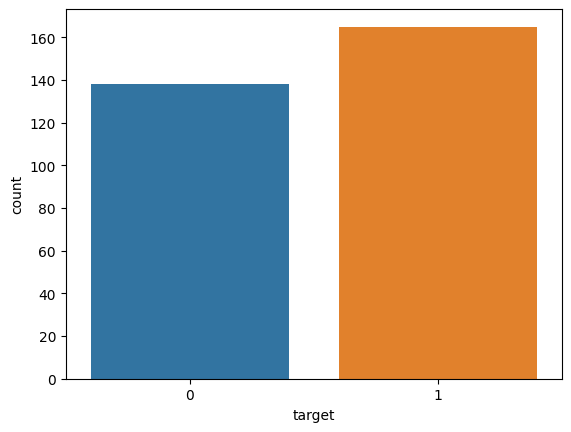

In [43]:
sns.countplot(x = 'target', data = df);

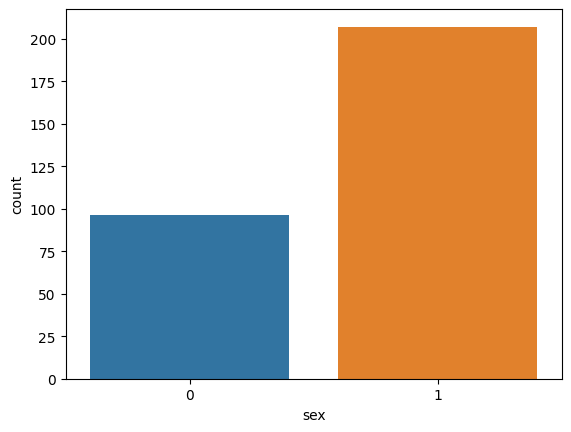

In [44]:
#data representation according to sex
sns.countplot( x = 'sex', data = df);

In [45]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

### From the graph above and value_counts method, we can see that we have more males represented in a dataset( more than twice as many males are represented)

### Now I want to check how many males and how may females got heart disease

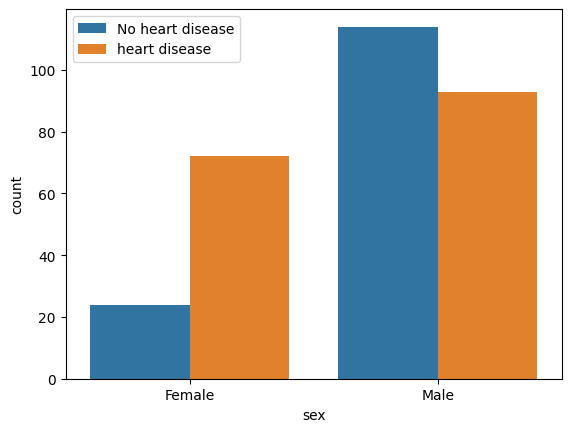

In [46]:
sns.countplot(x = 'sex', hue = 'target', data = df)
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(['No heart disease','heart disease']);


In [47]:
pd.crosstab(df.target, df.sex, normalize=True)


sex,0,1
target,,
0,0.079208,0.376238
1,0.237624,0.306931


In [48]:
df.groupby(['sex','target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

### I want to check how resting blood pressure relates to heart disease.

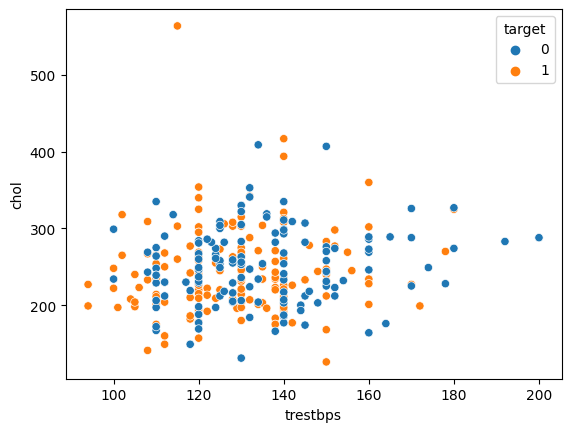

In [49]:

sns.scatterplot(x='trestbps', y='chol', hue = 'target', data=df);

### From the graph one can see, there is no connection noticible between resting blood pressure and heart disease.

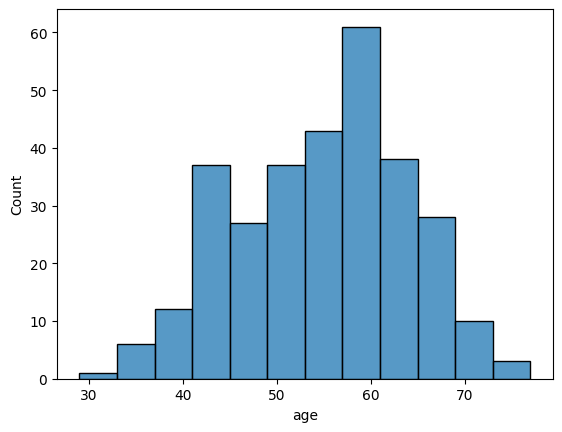

In [50]:
sns.histplot(x = 'age', data = df);

### We can see that age is normally distributed in the dataset, it looks like the pick of heart disease presence falls on late 50s, early 60s

### Let's see the correlation matrix between all variables

In [51]:
corr_matrix = df.corr()

(14.5, -0.5)

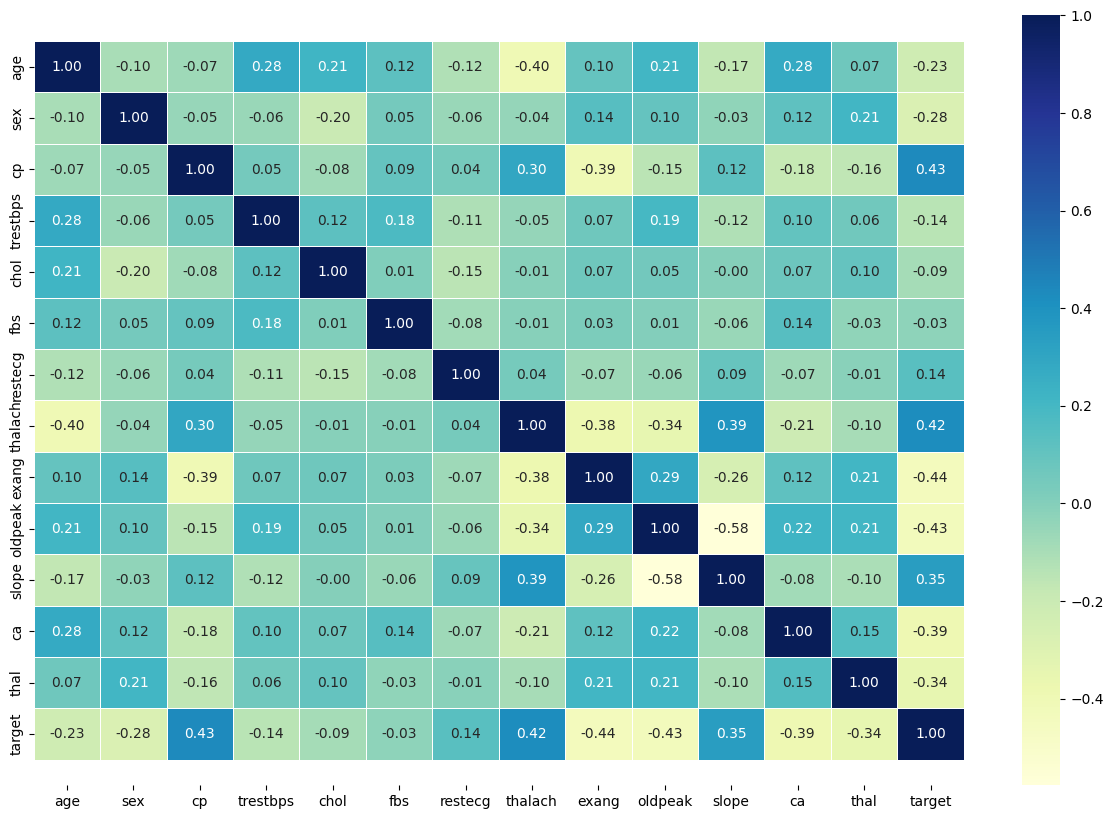

In [52]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)